<a href="https://colab.research.google.com/github/Sohaib-50/German-Traffic-Sign-Recognition/blob/main/German_Traffic_Sign_Recognition_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Getting Test Data And Understanding Structure

### Downloading and Unzipping Test Data


In [ ]:
!wget -c https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip -P /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset
!unzip /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/GTSRB_Final_Test_GT.zip -d /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/Test_GT

!wget -c https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip -P /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset
!unzip /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/GTSRB_Final_Test_Images.zip -d /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/Test_Images


### Understanding Test_Images folder structure

In [ ]:
!ls /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/Test_Images


GTSRB


In [ ]:
!ls /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/Test_Images/GTSRB

Final_Test  Readme-Images-Final-test.txt


In [ ]:
!ls /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test

Images


In [ ]:
!ls /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images

00000.ppm  02106.ppm  04212.ppm  06318.ppm  08424.ppm  10530.ppm
00001.ppm  02107.ppm  04213.ppm  06319.ppm  08425.ppm  10531.ppm
00002.ppm  02108.ppm  04214.ppm  06320.ppm  08426.ppm  10532.ppm
00003.ppm  02109.ppm  04215.ppm  06321.ppm  08427.ppm  10533.ppm
00004.ppm  02110.ppm  04216.ppm  06322.ppm  08428.ppm  10534.ppm
00005.ppm  02111.ppm  04217.ppm  06323.ppm  08429.ppm  10535.ppm
00006.ppm  02112.ppm  04218.ppm  06324.ppm  08430.ppm  10536.ppm
00007.ppm  02113.ppm  04219.ppm  06325.ppm  08431.ppm  10537.ppm
00008.ppm  02114.ppm  04220.ppm  06326.ppm  08432.ppm  10538.ppm
00009.ppm  02115.ppm  04221.ppm  06327.ppm  08433.ppm  10539.ppm
00010.ppm  02116.ppm  04222.ppm  06328.ppm  08434.ppm  10540.ppm
00011.ppm  02117.ppm  04223.ppm  06329.ppm  08435.ppm  10541.ppm
00012.ppm  02118.ppm  04224.ppm  06330.ppm  08436.ppm  10542.ppm
00013.ppm  02119.ppm  04225.ppm  06331.ppm  08437.ppm  10543.ppm
00014.ppm  02120.ppm  04226.ppm  06332.ppm  08438.ppm  10544.ppm
00015.ppm  02121.ppm  042

In [ ]:
import csv

csv_file_path = f"./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images/GT-final_test.test.csv"

print("First 5 rows:")
with open(csv_file_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    i = 0
    for row in csv_reader:
        print(row)
        i += 1
        if i == 5:
          break

First 5 rows:
['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2']
['00000.ppm', '53', '54', '6', '5', '48', '49']
['00001.ppm', '42', '45', '5', '5', '36', '40']
['00002.ppm', '48', '52', '6', '6', '43', '47']
['00003.ppm', '27', '29', '5', '5', '22', '24']


### Understanding Test_GT (Test_GroundTruth) folder structure

In [ ]:
!ls /content/drive/MyDrive/NED/Semester\ 8/Computer\ Vision/Final-Project/dataset/Test_GT

GT-final_test.csv


In [ ]:
import csv

csv_file_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_GT/GT-final_test.csv"

print("First 5 rows:")
with open(csv_file_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    i = 0
    for row in csv_reader:
        print(row)
        i += 1
        if i == 5:
          break

First 5 rows:
['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
['00000.ppm', '53', '54', '6', '5', '48', '49', '16']
['00001.ppm', '42', '45', '5', '5', '36', '40', '1']
['00002.ppm', '48', '52', '6', '6', '43', '47', '38']
['00003.ppm', '27', '29', '5', '5', '22', '24', '33']


Will use the csv annotation file from ground truth folde: `./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_GT/GT-final_test.csv` for cropping and getting class for images

# Testing

## Test Data Preprocessing And Loading

### Cropping Images

In [22]:
import random
import pandas as pd
import cv2
import os

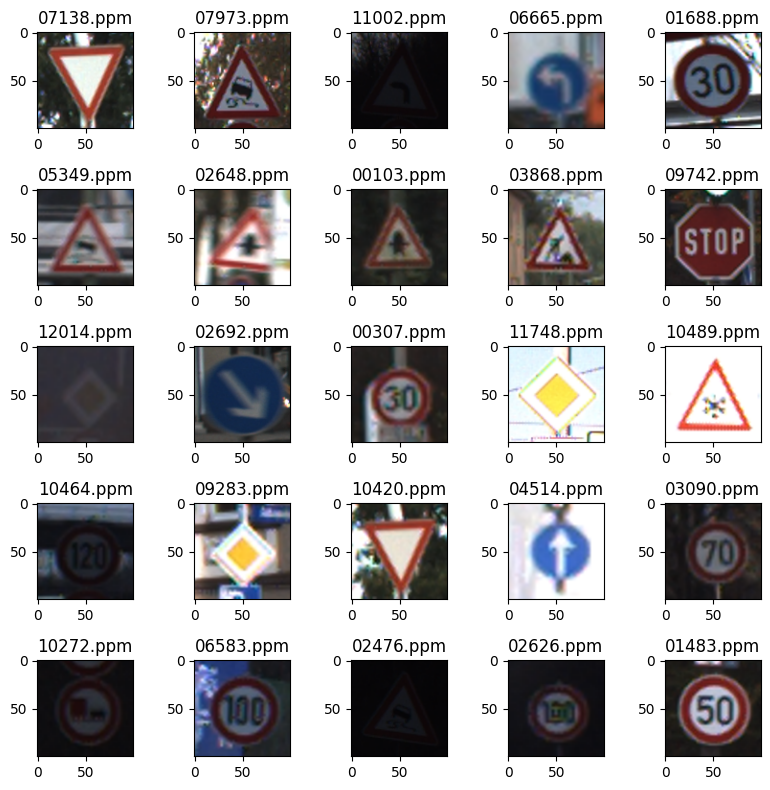

In [66]:
# Set the path to the folder containing the images
folder_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images/"

# Set the number of rows and columns in the grid
rows = 5
cols = 5

# Get a list of image file names from the folder
file_names = os.listdir(folder_path)

# Filter the list to include only image files
file_names = [f for f in file_names if f.endswith(".ppm")]

# Shuffle the list of file names
np.random.shuffle(file_names)

# Select the first rows * cols file names
file_names = file_names[:rows * cols]

# Create a new figure with a size of 8x8 inches
figure(figsize=(8, 8))

# Loop over the file names and load and display each image in a subplot
for i, file_name in enumerate(file_names):
    # Load the image using PIL
    img = Image.open(os.path.join(folder_path, file_name))
    
    # Resize the image to 100x100 pixels
    img = img.resize((100, 100))
    
    # Add the image to a subplot
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    
    # Add the file name as a title
    plt.title(file_name)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()

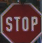

In [70]:
img = Image.open(os.path.join(original_images_folder, file_name))
cropped_image.show()

In [72]:
GT_csv_file_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_GT/GT-final_test.csv"
GT_csv_content = pd.read_csv(GT_csv_file_path, delimiter=";")  # Load annotation information
original_images_folder = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images/"
cropped_images_folder_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images_Cropped"
os.makedirs(cropped_images_folder_path, exist_ok=True)  # make directory to store cropped images

for file_name in os.listdir(original_images_folder):
    if file_name.endswith(".ppm"):
        row = GT_csv_content.loc[GT_csv_content['Filename'] == file_name]
        filename, width, height, x1, y1, x2, y2, class_id = row.values[0]

        image = Image.open(os.path.join(original_images_folder, file_name))

        # crop image
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cropped_image = image.crop((x1, y1, x2, y2))

        # Save cropped image to the new directory
        cropped_image.save(os.path.join(cropped_images_folder_path, file_name))

print("Done cropping all test images!")

Done cropping all test images!


*Checking whether cropping was done correctly by comparing number of images in original folder to that in cropped folder*

In [ ]:
!ls -1 "/content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images/"/*.ppm | wc -l


12630


In [ ]:
!ls -1 "/content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images_Cropped/"/*.ppm | wc -l


12630


### Loading Images And Labels

In [6]:
import pandas as pd
from PIL import Image
import os

In [14]:
GT_csv_file_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_GT/GT-final_test.csv"
GT_csv_content = pd.read_csv(GT_csv_file_path, delimiter=";")  # Load annotation information
cropped_images_folder_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images_Cropped"

images = []
labels = []

print("Loading dataset")
for image_file_name in os.listdir(cropped_images_folder_path):

  # load image
  image_file_path = os.path.join(cropped_images_folder_path, image_file_name)
  image = Image.open(image_file_path)
  images.append(image)

  # load label
  image_GT_row = GT_csv_content.loc[GT_csv_content['Filename'] == file_name]
  filename, width, height, x1, y1, x2, y2, class_id = image_GT_row.values[0]
  labels.append(int(class_id))

print(f"{len(images)} images and corresponding labels loaded")

Loading dataset
12630 images and corresponding labels loaded


### Preprocessing

In [15]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [80]:
# Resizing to same size
for idx, image in enumerate(images):
    images[idx] = image.resize((48, 48))

images = np.array([np.array(img) for img in images])  # Convert images to numpy arrays
images = images / 255.0  # Normalizing the pixel values
labels = np.array(labels)  # Convert labels to numpy arrays

labels = to_categorical(labels, num_classes=43)  # one_hot_encoding

print("preprocessing done")

preprocessing done


## Loading And Running Model

### Loading Model

In [81]:
from tensorflow.keras.models import load_model
model = load_model('./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/model/model.h5')

In [82]:
predictions = model.predict(images)

395/395 [==============================] - 15s 38ms/step


In [83]:
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)
accuracy = np.mean(predicted_labels == true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.06033254156769596


In [84]:
len(predictions)

12630

# Checking Why Results Are Poor


*Seeing whether the test data set has very different kinds of images compared to training set*

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from PIL import Image
import cv2

### Viewing few random images 

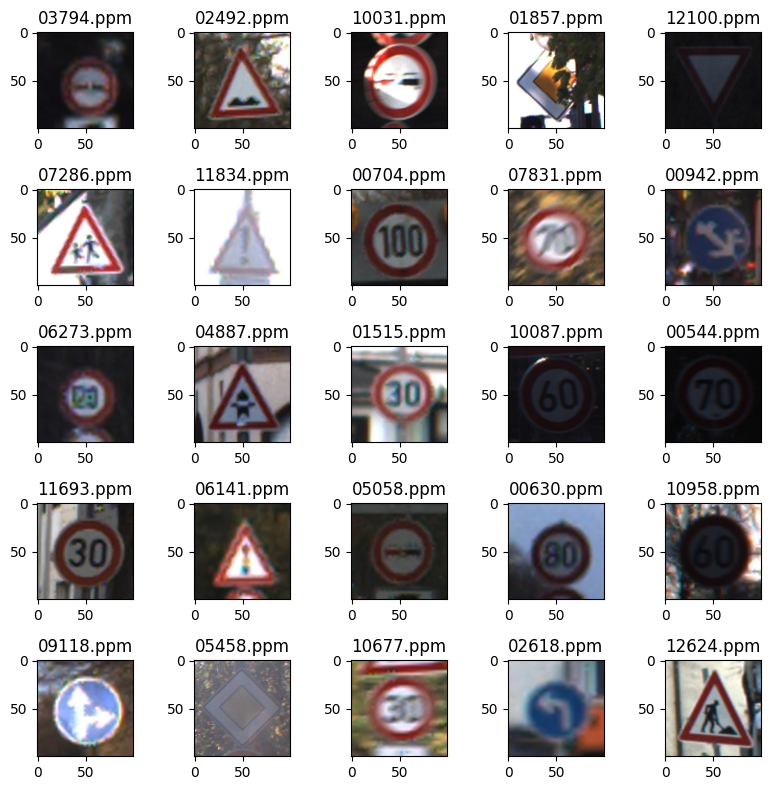

In [2]:
# Set the path to the folder containing the images
original_images_folder_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images/"

# Set the number of rows and columns in the grid
rows = 5
cols = 5

# Get a list of image file names from the folder
file_names = os.listdir(original_images_folder_path)

# Filter the list to include only image files
file_names = [f for f in file_names if f.endswith(".ppm")]

# Shuffle the list of file names
np.random.shuffle(file_names)

# Select the first rows * cols file names
file_names = file_names[:rows * cols]

# Create a new figure with a size of 8x8 inches
figure(figsize=(8, 8))

# Loop over the file names and load and display each image in a subplot
for i, file_name in enumerate(file_names):
    # Load the image using PIL
    img = Image.open(os.path.join(original_images_folder_path, file_name))
    
    # Resize the image to 100x100 pixels
    # img = img.resize((100, 100))
    
    # Add the image to a subplot
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    
    # Add the file name as a title
    plt.title(file_name)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()

*images seem to be the same kind*

Simplified the model, used grayscale images, and performed cropping with PIL instead of CV2. Now trying out the new model model3

# Model 3.0

## Test Data Preprocessing And Loading

### Cropping Images

In [85]:
import os
from PIL import Image
import pandas as pd

In [86]:
GT_csv_file_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_GT/GT-final_test.csv"
GT_csv_content = pd.read_csv(GT_csv_file_path, delimiter=";")  # Load annotation information
original_images_folder = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images/"
cropped_images_folder_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images_Cropped"
os.makedirs(cropped_images_folder_path, exist_ok=True)  # make directory to store cropped images

for file_name in os.listdir(original_images_folder):
    if file_name.endswith(".ppm"):
        row = GT_csv_content.loc[GT_csv_content['Filename'] == file_name]
        filename, width, height, x1, y1, x2, y2, class_id = row.values[0]

        image = Image.open(os.path.join(original_images_folder, file_name))

        # crop image
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cropped_image = image.crop((x1, y1, x2, y2))

        # Save cropped image to the new directory
        cropped_image.save(os.path.join(cropped_images_folder_path, file_name))

print("Done cropping all test images!")

Done cropping all test images!


*Checking whether cropping was done correctly by comparing number of images in original folder to that in cropped folder*

In [87]:
!ls -1 "/content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images/"/*.ppm | wc -l


12630


In [88]:
!ls -1 "/content/drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images_Cropped/"/*.ppm | wc -l


12630


### Loading Images And Labels

In [89]:
import pandas as pd
from PIL import Image
import os

In [91]:
GT_csv_file_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_GT/GT-final_test.csv"
GT_csv_content = pd.read_csv(GT_csv_file_path, delimiter=";")  # Load annotation information
cropped_images_folder_path = "./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/dataset/Test_Images/GTSRB/Final_Test/Images_Cropped"

images = []
labels = []

print("Loading dataset")
for image_file_name in os.listdir(cropped_images_folder_path):

  # load image
  image_file_path = os.path.join(cropped_images_folder_path, image_file_name)
  image = Image.open(image_file_path)
  images.append(image)

  # load label
  image_GT_row = GT_csv_content.loc[GT_csv_content['Filename'] == file_name]
  filename, width, height, x1, y1, x2, y2, class_id = image_GT_row.values[0]
  labels.append(int(class_id))

print(f"{len(images)} images and corresponding labels loaded")

Loading dataset
12630 images and corresponding labels loaded


### Preprocessing

In [92]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [93]:
# Resizing to same size
for idx, image in enumerate(images):
    image = image.resize((48, 48))
    image = image.convert("L")
    images[idx] = image

images = np.array([np.array(img) for img in images])  # Convert images to numpy arrays
images = images / 255.0  # Normalizing the pixel values
labels = np.array(labels)  # Convert labels to numpy arrays

labels = to_categorical(labels, num_classes=43)  # one_hot_encoding

print("preprocessing done")

preprocessing done


In [109]:
true_labels

array([1, 1, 1, ..., 1, 1, 1])

In [108]:
labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [112]:
predicted_labels

array([ 2,  2,  2, ..., 38, 38, 38])

In [111]:
predictions


array([[7.3358201e-06, 9.3587174e-04, 9.9712330e-01, ..., 2.7301446e-06,
        1.7433596e-11, 1.1488127e-10],
       [1.4414275e-05, 1.1348776e-01, 8.6329913e-01, ..., 2.5652751e-04,
        6.7604095e-10, 4.9918714e-07],
       [4.8626957e-06, 4.5036647e-04, 9.9869108e-01, ..., 3.6042695e-06,
        1.8774564e-11, 6.0609767e-11],
       ...,
       [6.5205685e-10, 2.4674282e-11, 6.5034406e-10, ..., 5.9998007e-11,
        4.1823583e-14, 4.1902511e-16],
       [6.8139730e-12, 1.0063980e-12, 2.1688450e-11, ..., 5.3763493e-13,
        2.8568053e-14, 5.4085447e-16],
       [5.2797990e-13, 9.3052822e-13, 3.4006988e-13, ..., 1.9653955e-15,
        5.6991790e-15, 1.9162005e-16]], dtype=float32)

## Loading And Running Model

### Loading Model

In [96]:
from tensorflow.keras.models import load_model
model = load_model('./drive/MyDrive/NED/Semester 8/Computer Vision/Final-Project/model/model3.h5')

In [97]:
predictions = model.predict(images)

395/395 [==============================] - 14s 35ms/step


In [119]:
from tensorflow.keras.utils import to_categorical

In [124]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = to_categorical(predicted_labels,num_classes=43)
accuracy = np.mean(predicted_labels == labels)
print("Accuracy:", accuracy)

Accuracy: 0.9562945368171022


In [125]:
from sklearn.metrics import confusion_matrix, classification_report


Confusion Matrix:
[[  0   0   0 ...   0   0   0]
 [ 59 762 754 ...  78  21  92]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.06      0.11     12630
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
